# **Step 1:Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
import sys
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix as cm
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

# **Step 2 : Reading and Comprehending Data**



In this section:

2.1 Reading Data

2.2  Understanding the Data

2.3 Checking for missing values

**2.1 Reading Data**

In [3]:
file_name = '/content/drive/My Drive/YapAiTek Assessment/psi_df_2016_2019.csv'
psi_df = pd.read_csv(file_name)

**2.2 Understanding the Data**

In [4]:
psi_df.head()

,national,south,north,east,central,west,timestamp
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00


In [5]:
psi_df.shape

(30022, 7)

We can see that there are 30022 instances and 7 attributes in the data set.

In [6]:
psi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30022 entries, 0 to 30021
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   national   30022 non-null  int64 
 1   south      30022 non-null  int64 
 2   north      30022 non-null  int64 
 3   east       30022 non-null  int64 
 4   central    30022 non-null  int64 
 5   west       30022 non-null  int64 
 6   timestamp  30022 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.6+ MB


In [7]:
psi_df.describe()

,national,south,north,east,central,west
count,30022.000000,30022.000000,30022.000000,30022.000000,30022.000000,30022.000000
mean,50.502232,54.294351,54.003464,52.491007,52.885884,50.299014
std,13.107219,10.844489,10.991413,10.365553,11.832203,11.672157
min,13.000000,20.000000,19.000000,14.000000,13.000000,16.000000
25%,42.000000,50.000000,49.000000,47.000000,47.000000,43.000000
50%,53.000000,54.000000,55.000000,54.000000,54.000000,52.000000
75%,58.000000,59.000000,59.000000,58.000000,59.000000,57.000000
max,143.000000,154.000000,145.000000,131.000000,154.000000,143.000000


Just south and central area have high PSI level, other areas have normal or elevated PSI level


**2.3 Checking for Missing Values**

In [ ]:
psi_df.isnull().sum()

national              0
south                 0
north                 0
east                  0
central               0
west                  0
timestamp             0
year                  0
month                 0
day                   0
date                  0
mean_allArea          0
season                0
year_month            0
mean_allArea_level    0
dtype: int64

Note:there are no missing values in the dataset.

# **Step 3 : Data Preprocessing**

In [8]:
#converts timestamp variable to datetime format
psi_df.timestamp = pd.to_datetime(psi_df.timestamp)

In [9]:
#define year and month attribute
psi_df['year']=psi_df.timestamp.dt.year
psi_df['month']=psi_df.timestamp.dt.month
psi_df['day']=psi_df.timestamp.dt.day

In [10]:
psi_df['date']=psi_df.timestamp.dt.date

In [11]:
#calculate mean of all area
area_column = ['national','south', 'north', 'east', 'central', 'west']
psi_df['mean_allArea'] = psi_df[area_column].mean(axis=1)

In [12]:
#convert a date time series to season
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
#1 for winter
#2 for spring
#3 for summer
#4 for autumn
seasons = [(1, (date(Y,  1,  1),  date(Y,  3, 20))),
           (2, (date(Y,  3, 21),  date(Y,  6, 20))),
           (3, (date(Y,  6, 21),  date(Y,  9, 22))),
           (4, (date(Y,  9, 23),  date(Y, 12, 20))),
           (1, (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [13]:
#define season attribute
psi_df['season'] = psi_df.timestamp.map(get_season)

# **Step 4 : Data Visualization**


In this section:

4.1 Viewing Columns

4.2 Distribution of Average PSI 

4.3 Visualize relationship between year and Average PSI

4.4 Checking Correlation

4.5 Exploring PSI Levels with respect to a season in different regions

4.6 Exploring PSI level in different month

**4.1 Viewing Columns**

In [14]:
print(psi_df.columns)

Index(['national', 'south', 'north', 'east', 'central', 'west', 'timestamp',
       'year', 'month', 'day', 'date', 'mean_allArea', 'season'],
      dtype='object')


**4.2 Distribution of Average PSI**

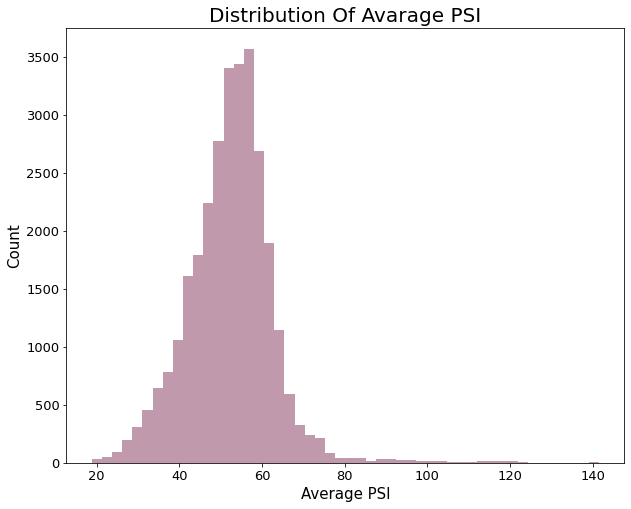

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(psi_df['mean_allArea'], kde=False,color="#660033");
plt.xlabel('Average PSI', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution Of Avarage PSI', fontsize=20,loc='center')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation=0)
plt.show()

Obseravation:

There is more air quality level between 55 and 60.

**4.3 Visualize relationship between year and Average PSI**

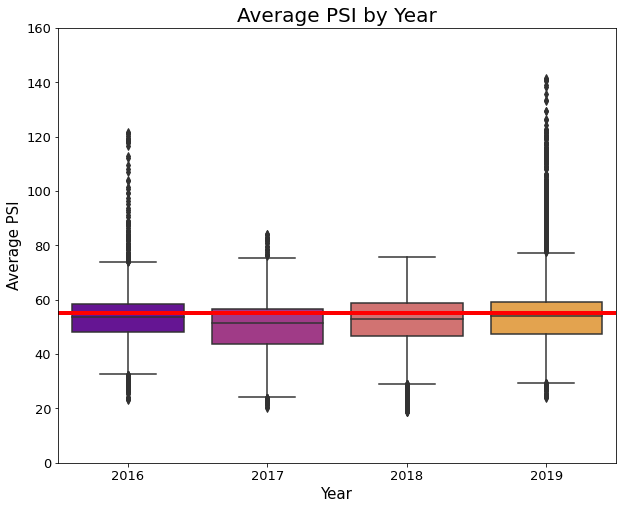

In [16]:
#box plot year/Avarage PSI
plt.figure(figsize=(10,8))
var = 'year'
data = pd.concat([psi_df['mean_allArea'], psi_df[var]], axis=1)
fig = sns.boxplot(x=var, y="mean_allArea", data=data,palette='plasma')
fig.axis(ymin=0, ymax=160);
plt.axhline(y=55,linewidth=4, color='r')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average PSI', fontsize=15)
plt.title('Average PSI by Year', fontsize=20,loc='center')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation=0)
plt.show()


Note: The red line indicates the air quality more than 55 PSI.

Obseravation:

the amount of outliers in 2019 is more than other years.This means that the level of PSI is higher than other years

**4.4 Checking Correlation**

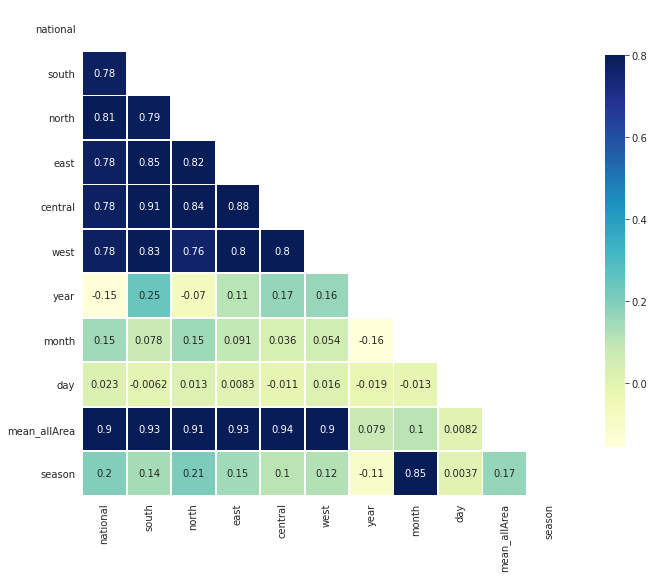

In [17]:
#correlation matrix 
corrmap = psi_df.corr()
mask = np.zeros_like(corrmap)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax=sns.heatmap(corrmap,mask=mask,vmax=.8, square=True,annot=True,linewidths=.6, cbar_kws={"shrink": 0.8},cmap='YlGnBu');


Interpretation:

we can see that season attribute has very low relation degrees with national, south, east, central, west attributes

**4.5 Exploring PSI Levels with respect to a season in different regions**

In [18]:
#groupby by date to calculate PSi by day
psi_by_day=psi_df.groupby(['date'],as_index=False).mean()
psi_by_day["season"].replace({1: "winter", 2: "spring",3:'summer',4:'autumn'}, inplace=True)

In [19]:
#convert PSI values to different levels 
#define bins
bins1 = [0, 55, 150]
bins2 = [0, 55, 150, np.inf]
#define labels
names1 = ['normal', 'elevated']
names2= ['normal', 'elevated', 'high']

psi_by_day['national_level'] = pd.cut(psi_by_day.national, bins1, labels=names1)
psi_by_day['south_level'] = pd.cut(psi_by_day.south, bins2, labels=names2)
psi_by_day['west_level'] = pd.cut(psi_by_day.west, bins1, labels=names1)
psi_by_day['east_level'] = pd.cut(psi_by_day.east, bins1, labels=names1)
psi_by_day['north_level'] = pd.cut(psi_by_day.north, bins1, labels=names1)
psi_by_day['central_level'] = pd.cut(psi_by_day.central, bins2, labels=names2)
psi_by_day['mean_allArea_level'] = pd.cut(psi_by_day.mean_allArea, bins1, labels=names1)


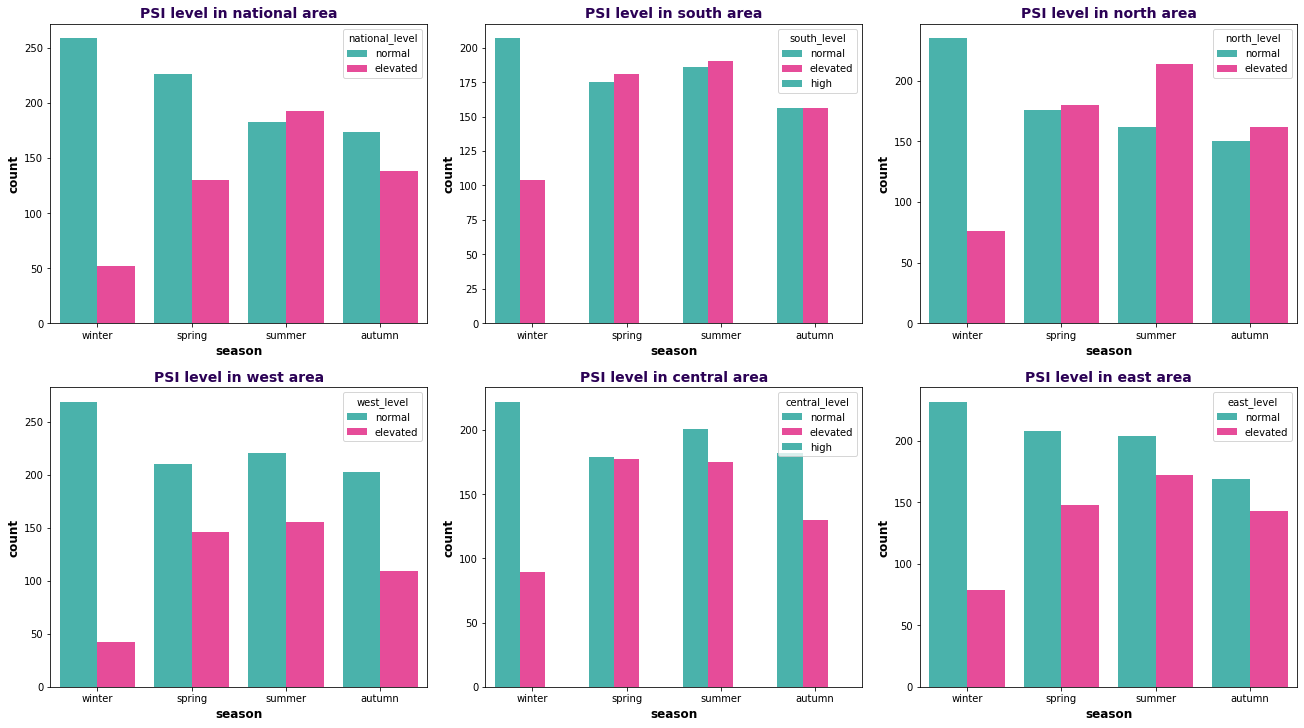

In [20]:
fig, axs= plt.subplots(2,3,figsize=(18, 10),constrained_layout=True)
clrs=['#39C3BA','#FF3399']

sns.countplot(x="season", hue="national_level", data=psi_by_day,ax=axs[0,0],palette=clrs)
axs[0,0].set_title('PSI level in national area',fontsize=14,fontweight='bold',color="#2B0155")
axs[0,0].set_xlabel('season', fontsize=12, fontweight='bold')
axs[0,0].set_ylabel('count', fontsize=12, fontweight='bold')

sns.countplot(x="season", hue="west_level", data=psi_by_day,ax=axs[1,0],palette=clrs)
axs[1,0].set_title('PSI level in west area',fontsize=14,fontweight='bold',color="#2B0155")
axs[1,0].set_xlabel('season', fontsize=12, fontweight='bold')
axs[1,0].set_ylabel('count', fontsize=12, fontweight='bold')

sns.countplot(x="season", hue="central_level", data=psi_by_day,ax=axs[1,1],palette=clrs)
axs[1,1].set_title('PSI level in central area',fontsize=14,fontweight='bold',color="#2B0155")
axs[1,1].set_xlabel('season', fontsize=12, fontweight='bold')
axs[1,1].set_ylabel('count', fontsize=12, fontweight='bold')

sns.countplot(x="season", hue="north_level", data=psi_by_day,ax=axs[0,2],palette=clrs)
axs[0,2].set_title('PSI level in north area',fontsize=14,fontweight='bold',color="#2B0155")
axs[0,2].set_xlabel('season', fontsize=12, fontweight='bold')
axs[0,2].set_ylabel('count', fontsize=12, fontweight='bold')

sns.countplot(x="season", hue="east_level", data=psi_by_day,ax=axs[1,2],palette=clrs)
axs[1,2].set_title('PSI level in east area',fontsize=14,fontweight='bold',color="#2B0155")
axs[1,2].set_xlabel('season', fontsize=12, fontweight='bold')
axs[1,2].set_ylabel('count', fontsize=12, fontweight='bold')

sns.countplot(x="season", hue="south_level", data=psi_by_day,ax=axs[0,1],palette=clrs)
axs[0,1].set_title('PSI level in south area',fontsize=14,fontweight='bold',color="#2B0155")
axs[0,1].set_xlabel('season', fontsize=12, fontweight='bold')
axs[0,1].set_ylabel('count', fontsize=12, fontweight='bold')

plt.show()

observations:

*   on most days in winter, air quality has a normal level in different areas
*   In different areas, air quality is on elevated level in the summer compared to other seasons.
*  In the north region, the days with elevated air quality is more than others in the summer

**4.6 Exploring PSI level in different month**

In [21]:
psi_df['year_month'] = pd.to_datetime(psi_df['timestamp']).dt.to_period('M')
by_month = psi_df.groupby(['year_month'],as_index=False).mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


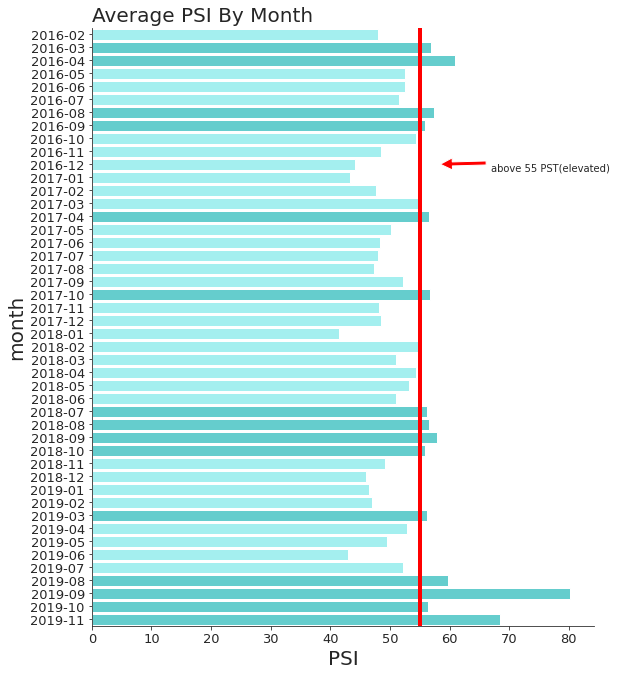

In [22]:
plt.figure(figsize=(9,11))
clrs = ['#54DEDE' if (x > 55)  else '#97FCFC' for x in by_month['mean_allArea'] ]
#set style
sns.set_style("ticks")
threshold = 43.0
sns.barplot(x=by_month['mean_allArea'], y=by_month.year_month, palette=clrs,orient = 'h') # color=clrs)
ax = plt.subplot(111)
plt.xlabel('PSI', fontsize=20)
plt.ylabel('month', fontsize=20)
plt.title('Average PSI By Month', fontsize=20,loc='left')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation=0)
plt.axvline(x=55,linewidth=4, color='r')
#plt.axvline(x=55, color='r', linestyle='-',linewidth=4)
ax.annotate('above 55 PST(elevated)', xy=(58, 10), xytext=(67,10.5),
            arrowprops=dict(facecolor='r', shrink=0.05,connectionstyle="arc3"),
            )
sns.despine()
plt.show()

observations:

During these years, the air quality is almost on an elevated level from July to November

In [23]:
#PSI level by season in each year
psi_df["season"].replace({1: "winter", 2: "spring",3:'summer',4:'autumn'}, inplace=True)
year_season=psi_df.groupby(['year','season'],as_index=False).mean()

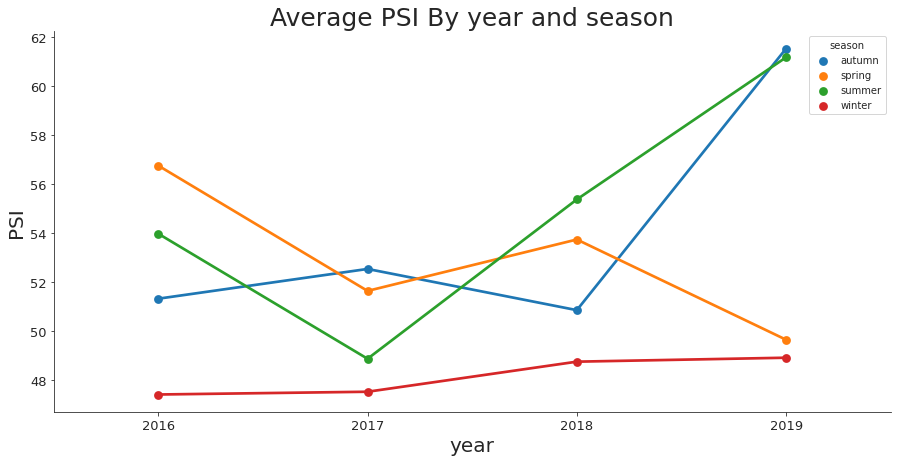

In [24]:
plt.figure(figsize=(15,7))
#set style
sns.set_style("ticks")
#sns.catplot(x="year", y="mean_allArea", hue="season", kind="point", data=data_,ax=axs1);
sns.pointplot(x="year", y="mean_allArea", hue="season", data=year_season)
plt.xlabel('year', fontsize=20)
plt.ylabel('PSI', fontsize=20)
plt.title('Average PSI By year and season', fontsize=25,loc='center')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation=0)
sns.despine()

Interpretation:

PSI level in winter is lower than other seasons  over these years

# **Step 5 :  Modelling**
In this section:

5.1 Declare feature vector and target variable

5.2 Splitting Data

5.3 Encode categorical variables

5.4 Fitting Models on Training Data

5.5 Confusion Matrix in Chart

5.6 ROC curve

**5.1 Declare feature vector and target variable**

In [25]:
psi_df['mean_allArea_level'] = pd.cut(psi_df.mean_allArea, bins1, labels=names1)
#define feature 
feature= ['year','month', 'season']
X = psi_df[feature]
#define target variable
y = psi_df['mean_allArea_level']

**5.2 Splitting Data**

In [26]:
# create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size=0.2, train_size=0.8)

**5.3 Encode categorical variables**

In [27]:
# prepare target
# encoding target variable
def prepare_targets(y_train, y_test):
	le =preprocessing.LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [28]:
# prepare input data
# encoding categorical variables for modeling in two ways:
# 1-onehot_encoding 
def prepare_inputs_oneHot(X_train, X_test):
	ohe =preprocessing.OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc
# 2-ordinal encoding 
def prepare_inputs_ordinal(X_train, X_test):
	oe = preprocessing.OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [29]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [30]:
X_train_enc, X_test_enc = prepare_inputs_oneHot(X_train, X_test)

**5.4 Fitting Model on Training Data**
*   Logistic Regression classification model
*   Multi multi layer perceptron model

In [31]:
#training model 
def train_model(classifier, X_train,y_train,X_test,y_test):
    # fit the training dataset on the classifier
    classifier.fit(X_train,y_train)
    # predict the labels on test dataset
    y_pred= classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    train_accuracy = classifier.score(X_train, y_train)
    test_accuracy = classifier.score(X_test, y_test)
    print(  'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
    'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')
    print("precision_score : ",  metrics.precision_score(y_test,y_pred))
    print("recall_score : ",  metrics.recall_score(y_test, y_pred))
    return y_pred,y_pred_proba

In [32]:
#define model
LR = LogisticRegression()
y_pred,y_pred_proba=train_model(LR,X_train_enc,y_train_enc,X_test_enc,y_test_enc)

Accuracy Score of Train Model : 0.69
Accuracy Score of Test  Model : 0.69
precision_score :  0.7151335311572701
recall_score :  0.8057954862078573


In [33]:
#define model
NN = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred,y_pred_proba=train_model(NN,X_train_enc,y_train_enc,X_test_enc,y_test_enc)
cm1 = cm(y_test_enc, y_pred)

Accuracy Score of Train Model : 0.73
Accuracy Score of Test  Model : 0.73
precision_score :  0.731966053748232
recall_score :  0.8651434940094734


**5.5 Confusion Matrix in Chart**


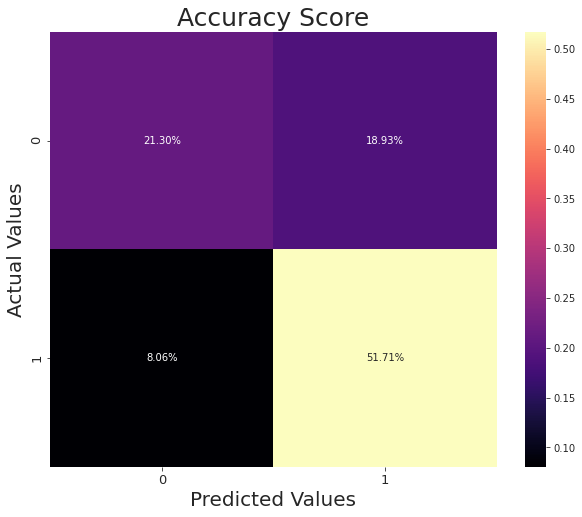

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='magma')
plt.xlabel('Predicted Values',fontsize=20)
plt.ylabel('Actual Values',fontsize=20)
plt.title('Accuracy Score', size = 25)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation=0)
plt.show()

**5.6 ROC Curve**

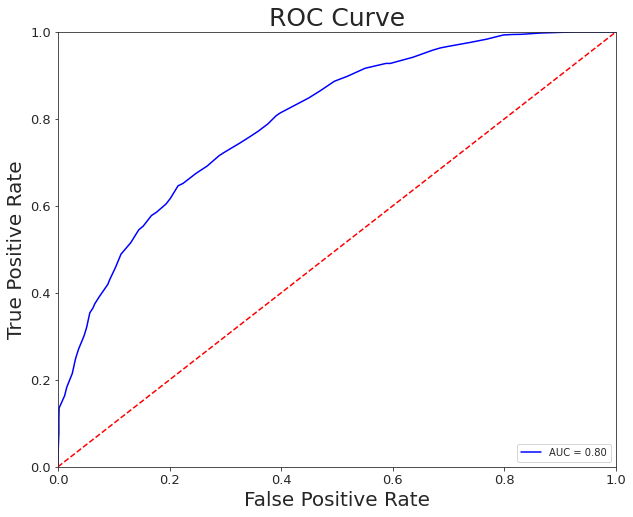

In [35]:
plt.figure(figsize=(10,8))
fpr, tpr, threshold = metrics.roc_curve(y_test_enc, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Curve',fontsize=25)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13, rotation=0)
plt.show()